# CME ETH Futures vs ETH prices

### Libs

In [252]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Functions

In [253]:
def show_scatter(dataset, tf):

    # Set the size of the plot
    plt.figure(figsize=(10, 6))  # Width and height in inches

    # Add regression line
    sns.regplot(x='Price_eth', y='Price_cme', data=dataset, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})

    # Plotting the dataset
    sns.scatterplot(x='Price_eth', y='Price_cme', data=dataset)
    plt.title(f'Scatter Plot of CME Price vs Eth Price on {tf} timeframe')
    plt.xlabel('Price CME')
    plt.ylabel('Price stEth')
    plt.show()

In [254]:
def show_distribution(df, price_name):

    # Plotting a histogram of the Price data along with a KDE overlay
    sns.histplot(df, bins=30, kde=True, edgecolor='darkblue', linewidth=0.1)
    plt.title(f'Distribution of {price_name} Price')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

In [255]:
def remove_outliers(df):
    for col in ['Price_cme','Price_eth']:
        # Calculate the 99th percentile
        upper_limit = df[col].quantile(0.99)

        # Filter the dataset to remove extreme outliers
        df = df[df[col] <= upper_limit]
    return df

In [256]:
def show_correlation(df):
    # Calculate Kendall’s Tau Correlation
    kendall_correlation = df['Price_cme'].corr(df['Price_eth'], method='kendall')
    print(f"Kendall's Tau Correlation Coefficient:   {kendall_correlation * 100:.4f}")

    # Calculate Spearman's Rank Correlation
    spearman_correlation = df['Price_cme'].corr(df['Price_eth'], method='spearman')
    print(f"Spearman's Rank Correlation Coefficient: {spearman_correlation * 100:.4f}")

    pearson_correlation = df['Price_cme'].corr(df['Price_eth'], method='pearson')
    print(f"Pearson Correlation Coefficient: {pearson_correlation * 100:.4f}")

In [257]:
def show_correlation_delta(df):
    # Calculate Kendall’s Tau Correlation
    kendall_correlation = df['Price_cme_delta'].corr(df['Price_eth_delta'], method='kendall')
    print(f"Kendall's Tau Correlation Coefficient:   {kendall_correlation * 100:.4f}")

    # Calculate Spearman's Rank Correlation
    spearman_correlation = df['Price_cme_delta'].corr(df['Price_eth_delta'], method='spearman')
    print(f"Spearman's Rank Correlation Coefficient: {spearman_correlation * 100:.4f}")

  # Calculate Pearsons's Correlation
    spearman_correlation = df['Price_cme_delta'].corr(df['Price_eth_delta'], method='pearson')
    print(f"Pearson's Correlation Coefficient: {spearman_correlation * 100:.4f}")


In [258]:
# Function to show correlation using log returns
def show_correlation_log_returns(df):
    # Calculate Kendall’s Tau Correlation
    kendall_correlation = df['Price_cme_log_return'].corr(df['Price_eth_log_return'], method='kendall')
    print(f"Kendall's Tau Correlation Coefficient:   {kendall_correlation * 100:.4f}")

    # Calculate Spearman's Rank Correlation
    spearman_correlation = df['Price_cme_log_return'].corr(df['Price_eth_log_return'], method='spearman')
    print(f"Spearman's Rank Correlation Coefficient: {spearman_correlation * 100:.4f}")

### Datasets

In [294]:
col_names = ['Entry Date UTC', 'Price']

# Load csv file for CME data
cme_data_1m = pd.read_csv('../data/cme/cme_1m.csv', usecols=col_names)

# Date conversion
cme_data_1m['Entry Date UTC'] = pd.to_datetime(
        cme_data_1m['Entry Date UTC'],
        format='%Y%m%dT%H:%M:%S',
        utc=True
    )

# Generate CME datasets for 5m & 1h
cme_data_1m.set_index('Entry Date UTC', inplace=True)
cme_data_1h = cme_data_1m[cme_data_1m.index.minute == 0]
cme_data_5m = cme_data_1m[cme_data_1m.index.minute % 5 == 0]
cme_data_1h.reset_index(inplace=True)
cme_data_5m.reset_index(inplace=True)

# Load csv file for ETH data
eth_data_5m = pd.read_csv('../data/eth/eth_5m.csv', usecols=col_names)

# Date conversion
eth_data_5m['Entry Date UTC'] = pd.to_datetime(eth_data_5m['Entry Date UTC'], utc=True)

# Generate ETH datasets for 1h
eth_data_5m.set_index('Entry Date UTC', inplace=True)
eth_data_1h = eth_data_5m[eth_data_5m.index.minute == 0]
eth_data_1h.reset_index(inplace=True)

# Datasets merge
dataset_5m = pd.merge(cme_data_5m, eth_data_5m, on='Entry Date UTC', suffixes=('_cme', '_eth'))
dataset_1h = pd.merge(cme_data_1h, eth_data_1h, on='Entry Date UTC', suffixes=('_cme', '_eth'))

# Calculate diff & return on prices
dataset_5m['Price_cme_delta'] = dataset_5m['Price_cme'].diff()
dataset_5m['Price_eth_delta'] = dataset_5m['Price_eth'].diff()
dataset_5m['Price_cme_return'] = dataset_5m['Price_cme'].pct_change()
dataset_5m['Price_eth_return'] = dataset_5m['Price_eth'].pct_change()

dataset_1h['Price_cme_delta'] = dataset_1h['Price_cme'].diff()
dataset_1h['Price_eth_delta'] = dataset_1h['Price_eth'].diff()
dataset_1h['Price_cme_return'] = dataset_1h['Price_cme'].pct_change()
dataset_1h['Price_eth_return'] = dataset_1h['Price_eth'].pct_change()

# Remove null values
dataset_5m.dropna(subset=['Price_cme_return', 'Price_eth_return'], inplace=True)
dataset_1h.dropna(subset=['Price_cme_return', 'Price_eth_return'], inplace=True)


In [260]:
def set_time_range(dataset):
    return dataset[(dataset['Entry Date UTC'] >= '2022-01-03') & (dataset['Entry Date UTC'] <= '2023-12-31')]

dataset_1h, dataset_5m = [set_time_range(df) for df in [dataset_1h, dataset_5m]]


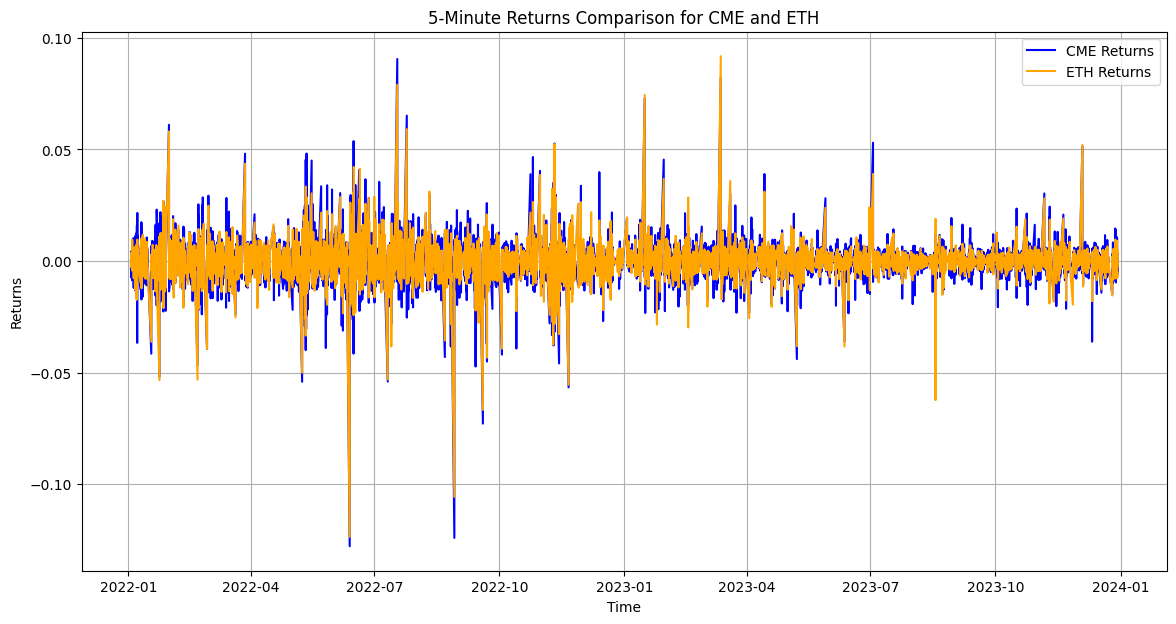

In [288]:
plt.figure(figsize=(14, 7))
plt.plot(dataset_5m['Entry Date UTC'], dataset_5m['Price_cme_return'], label='CME Returns', color='blue')
plt.plot(dataset_5m['Entry Date UTC'], dataset_5m['Price_eth_return'], label='ETH Returns', color='orange')
plt.title('5-Minute Returns Comparison for CME and ETH')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()


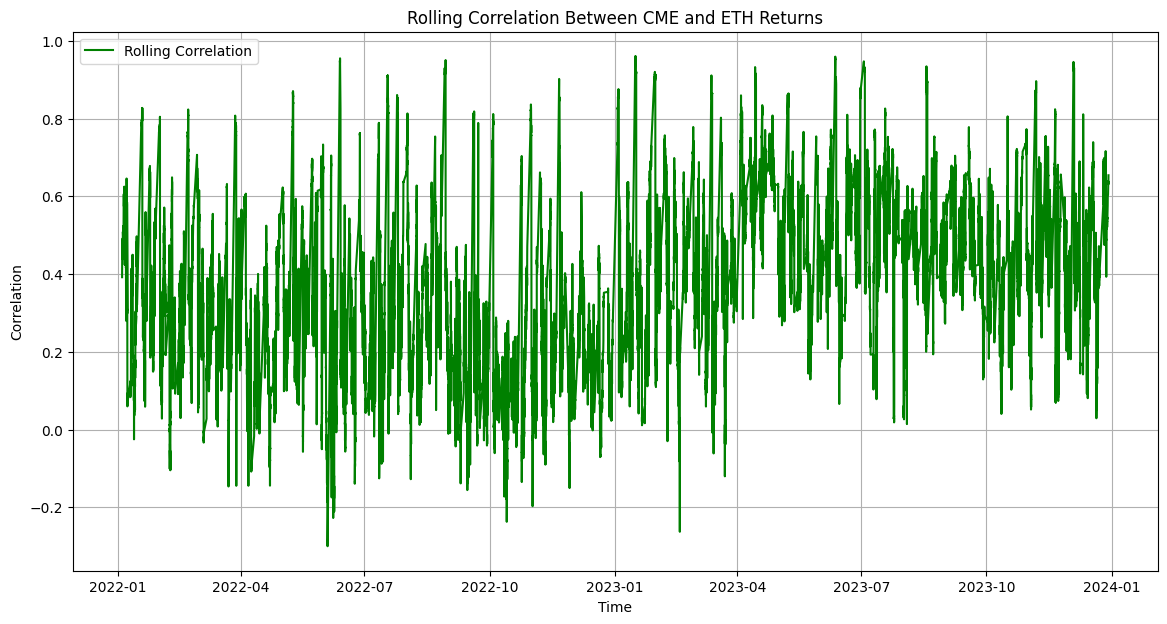

In [291]:
rolling_correlation = dataset_5m['Price_cme_return'].rolling(window=120).corr(dataset_5m['Price_eth_return'])
plt.figure(figsize=(14, 7))
plt.plot(dataset_5m['Entry Date UTC'], rolling_correlation, label='Rolling Correlation', color='green')
plt.title('Rolling Correlation Between CME and ETH Returns')
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()

In [292]:
# Establish thresholds based on statistical metrics
threshold_cme = 3 * dataset_5m['Price_cme_return'].std()
threshold_eth = 3 * dataset_5m['Price_eth_return'].std()

# Filter dataset to remove extreme outliers
filtered_dataset_5m = dataset_5m[
    (abs(dataset_5m['Price_cme_return']) <= threshold_cme) &
    (abs(dataset_5m['Price_eth_return']) <= threshold_eth)
]

# Recalculate correlations on the filtered dataset
new_correlation_5m = filtered_dataset_5m['Price_cme_return'].corr(filtered_dataset_5m['Price_eth_return'])
print(f"New 5-Minute Returns Correlation after removing extreme outliers: {new_correlation_5m}")


New 5-Minute Returns Correlation after removing extreme outliers: 0.2519736184749061


In [262]:
# Calculate correlations for both datasets
correlation_5m = dataset_5m['Price_cme_return'].corr(dataset_5m['Price_eth_return'])
correlation_1h = dataset_1h['Price_cme_return'].corr(dataset_1h['Price_eth_return'])

print(f"5-Minute Returns Correlation: {correlation_5m}")
print(f"1-Hour Returns Correlation: {correlation_1h}")


5-Minute Returns Correlation: 0.3984744118309214
1-Hour Returns Correlation: 0.9190496949945607


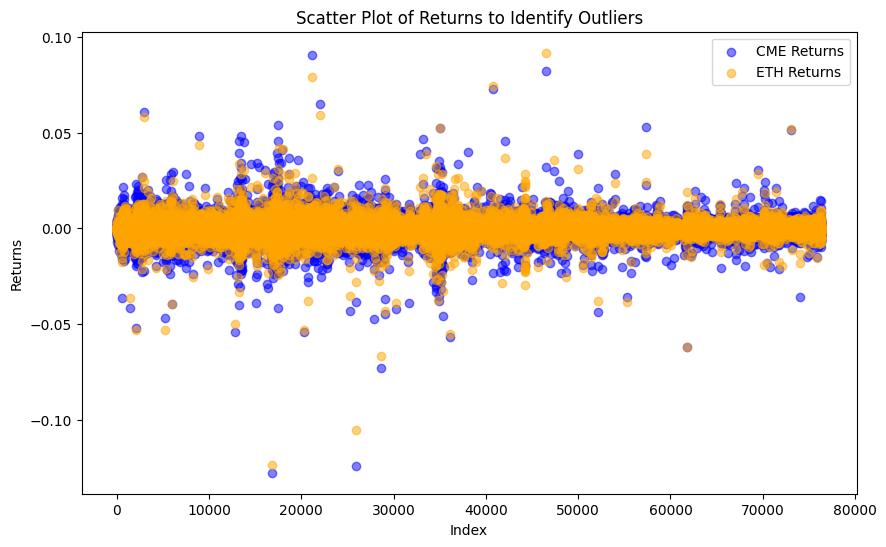

In [263]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(dataset_5m.index, dataset_5m['Price_cme_return'], color='blue', label='CME Returns', alpha=0.5)
plt.scatter(dataset_5m.index, dataset_5m['Price_eth_return'], color='orange', label='ETH Returns', alpha=0.5)
plt.title('Scatter Plot of Returns to Identify Outliers')
plt.xlabel('Index')
plt.ylabel('Returns')
plt.legend()
plt.show()


In [264]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

# Combine the returns into a single DataFrame for scaling
combined_returns = pd.DataFrame({
    'CME_Returns': dataset_5m['Price_cme_return'],
    'ETH_Returns': dataset_5m['Price_eth_return']
})

# Fit and transform the data
scaled_returns = scaler.fit_transform(combined_returns)

# Replace the original returns with scaled returns
dataset_5m['Price_cme_return_scaled'] = scaled_returns[:, 0]
dataset_5m['Price_eth_return_scaled'] = scaled_returns[:, 1]

# Recalculate correlation without outliers using scaled data
new_correlation_5m_scaled = dataset_5m['Price_cme_return_scaled'].corr(dataset_5m['Price_eth_return_scaled'])
print(f"New 5-Minute Returns Correlation with Scaled Data: {new_correlation_5m_scaled}")


New 5-Minute Returns Correlation with Scaled Data: 0.3984744118309219


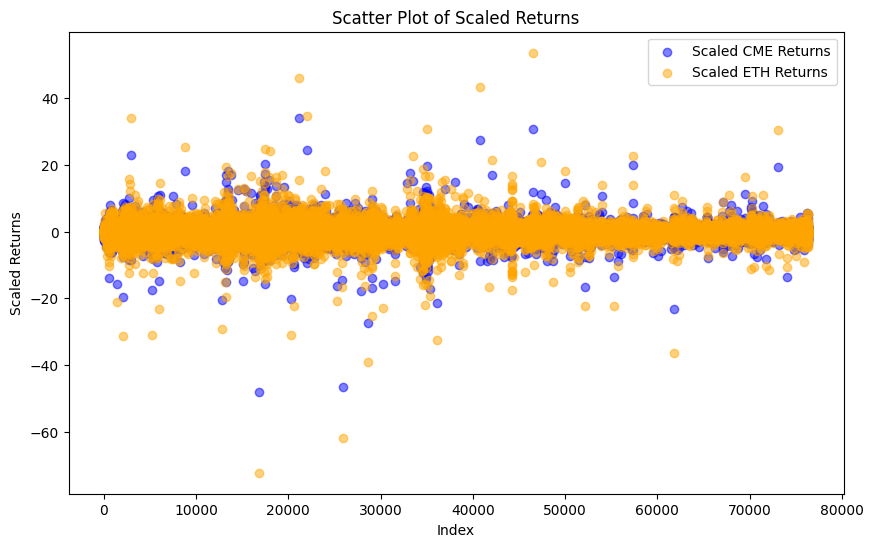

In [265]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset_5m.index, dataset_5m['Price_cme_return_scaled'], color='blue', label='Scaled CME Returns', alpha=0.5)
plt.scatter(dataset_5m.index, dataset_5m['Price_eth_return_scaled'], color='orange', label='Scaled ETH Returns', alpha=0.5)
plt.title('Scatter Plot of Scaled Returns')
plt.xlabel('Index')
plt.ylabel('Scaled Returns')
plt.legend()
plt.show()


In [266]:
import numpy as np

# Calculate Z-scores for returns
dataset_5m['Z_score_cme'] = (dataset_5m['Price_cme_return'] - dataset_5m['Price_cme_return'].mean()) / dataset_5m['Price_cme_return'].std()
dataset_5m['Z_score_eth'] = (dataset_5m['Price_eth_return'] - dataset_5m['Price_eth_return'].mean()) / dataset_5m['Price_eth_return'].std()

# Define a stricter threshold
z_threshold = 2.5

# Filter out outliers based on the stricter Z-score threshold
dataset_5m_strict = dataset_5m[(abs(dataset_5m['Z_score_cme']) <= z_threshold) & 
                               (abs(dataset_5m['Z_score_eth']) <= z_threshold)]

# Recalculate correlation without strict outliers
new_correlation_5m_strict = dataset_5m_strict['Price_cme_return'].corr(dataset_5m_strict['Price_eth_return'])
print(f"New 5-Minute Returns Correlation with Strict Z-score Outlier Removal: {new_correlation_5m_strict}")


New 5-Minute Returns Correlation with Strict Z-score Outlier Removal: 0.24048097682608022


In [267]:
# Calculate the IQR for each return
Q1_cme = dataset_5m['Price_cme_return'].quantile(0.25)
Q3_cme = dataset_5m['Price_cme_return'].quantile(0.75)
IQR_cme = Q3_cme - Q1_cme

Q1_eth = dataset_5m['Price_eth_return'].quantile(0.25)
Q3_eth = dataset_5m['Price_eth_return'].quantile(0.75)
IQR_eth = Q3_eth - Q1_eth

# Set a tighter multiplier
multiplier = 1.5

# Calculate stricter bounds
lower_bound_cme = Q1_cme - multiplier * IQR_cme
upper_bound_cme = Q3_cme + multiplier * IQR_cme
lower_bound_eth = Q1_eth - multiplier * IQR_eth
upper_bound_eth = Q3_eth + multiplier * IQR_eth

# Filter the data
dataset_5m_strict = dataset_5m[(dataset_5m['Price_cme_return'].between(lower_bound_cme, upper_bound_cme)) & 
                               (dataset_5m['Price_eth_return'].between(lower_bound_eth, upper_bound_eth))]

# Recalculate correlation
new_correlation_5m_strict = dataset_5m_strict['Price_cme_return'].corr(dataset_5m_strict['Price_eth_return'])
print(f"New 5-Minute Returns Correlation with Strict IQR Outlier Removal: {new_correlation_5m_strict}")


New 5-Minute Returns Correlation with Strict IQR Outlier Removal: 0.212193316818487


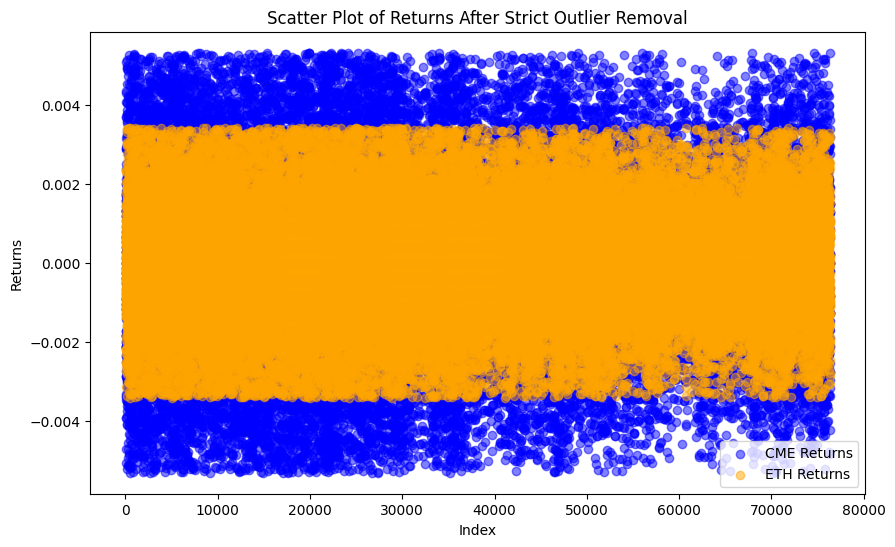

In [268]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(dataset_5m_strict.index, dataset_5m_strict['Price_cme_return'], color='blue', label='CME Returns', alpha=0.5)
plt.scatter(dataset_5m_strict.index, dataset_5m_strict['Price_eth_return'], color='orange', label='ETH Returns', alpha=0.5)
plt.title('Scatter Plot of Returns After Strict Outlier Removal')
plt.xlabel('Index')
plt.ylabel('Returns')
plt.legend()
plt.show()


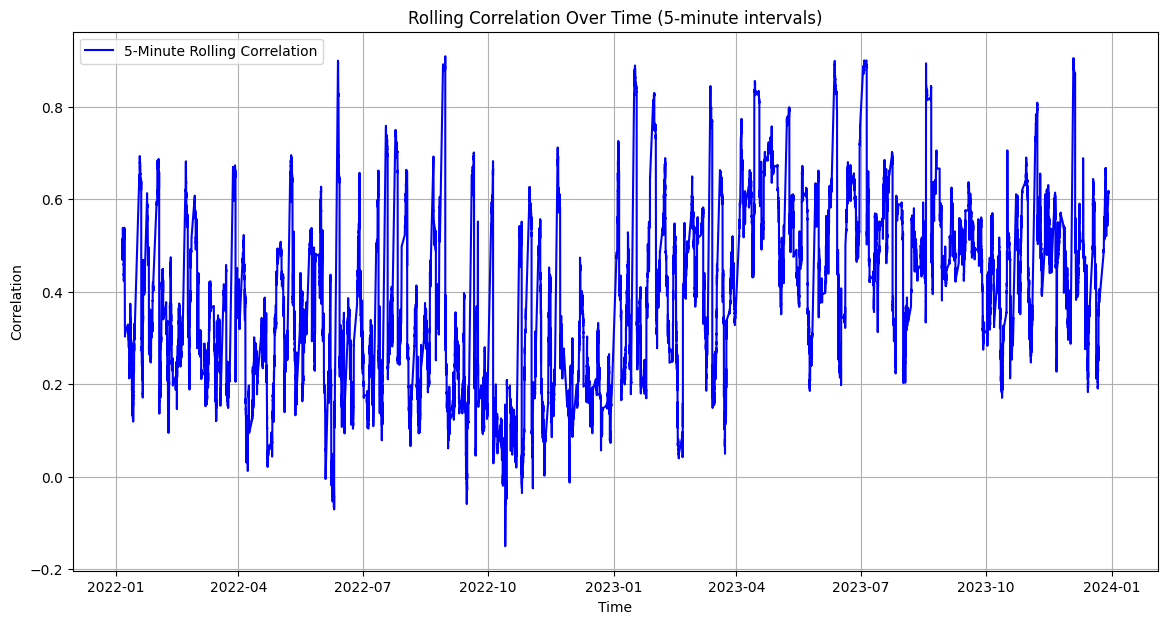

In [269]:
# Calculate rolling correlation
window_size = 24 * 12  # Example: 24 hours * 12 points per hour for 5-minute data
dataset_5m['rolling_corr'] = dataset_5m['Price_cme_return'].rolling(window=window_size).corr(dataset_5m['Price_eth_return'])

# Plot rolling correlation for 5-minute data
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(dataset_5m['Entry Date UTC'], dataset_5m['rolling_corr'], label='5-Minute Rolling Correlation', color='blue')
plt.title('Rolling Correlation Over Time (5-minute intervals)')
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()


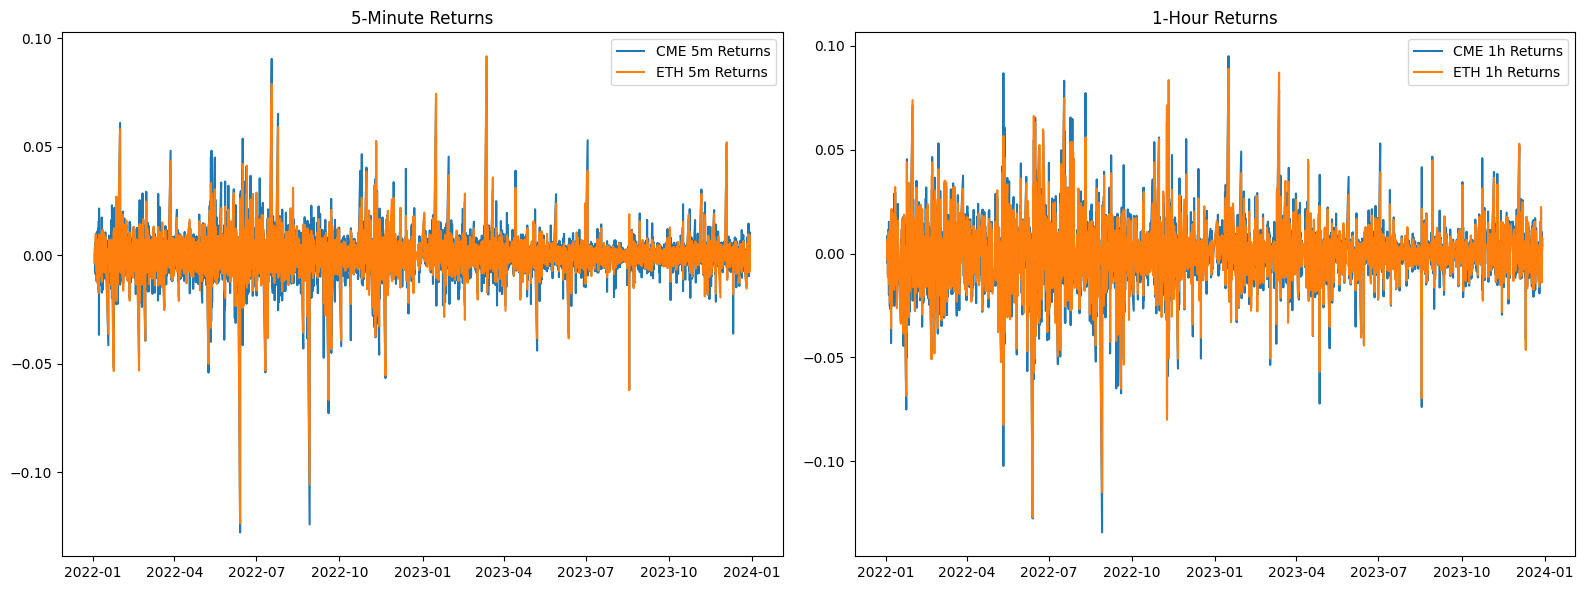

In [270]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(dataset_5m['Entry Date UTC'], dataset_5m['Price_cme_return'], label='CME 5m Returns')
plt.plot(dataset_5m['Entry Date UTC'], dataset_5m['Price_eth_return'], label='ETH 5m Returns')
plt.title('5-Minute Returns')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(dataset_1h['Entry Date UTC'], dataset_1h['Price_cme_return'], label='CME 1h Returns')
plt.plot(dataset_1h['Entry Date UTC'], dataset_1h['Price_eth_return'], label='ETH 1h Returns')
plt.title('1-Hour Returns')
plt.legend()

plt.tight_layout()
plt.show()


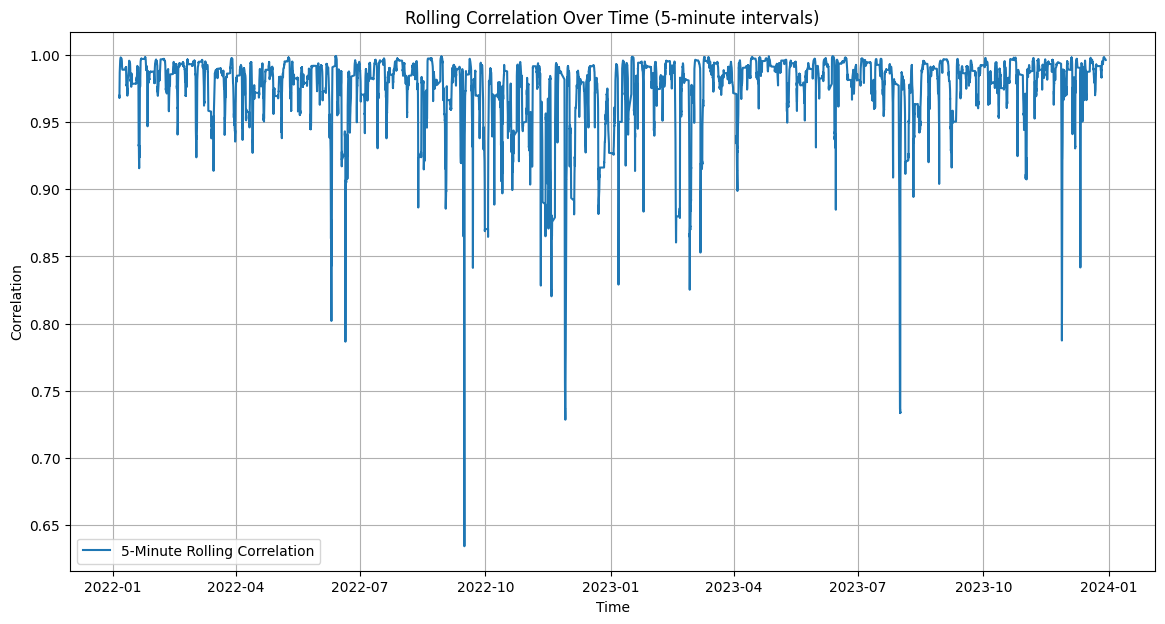

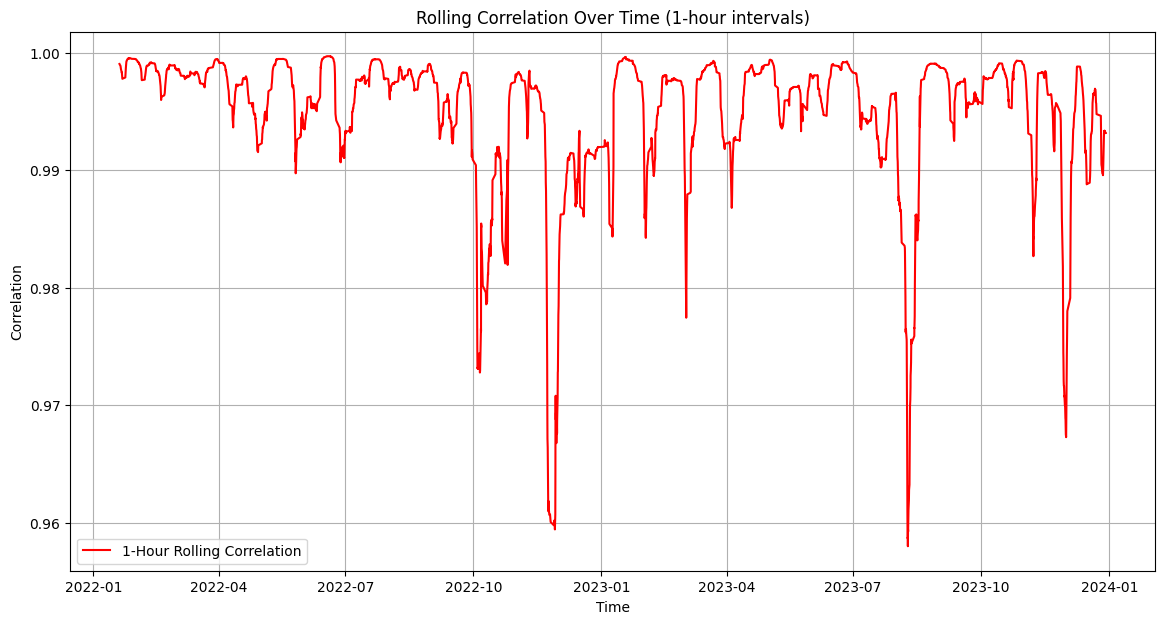

In [273]:
# Calculate rolling correlation for 5-minute data
window_size = 12 * 24  # Example: 12 points/hour * 24 hours = 288 points for a 24-hour window
dataset_5m['rolling_corr'] = dataset_5m['Price_cme'].rolling(window=window_size).corr(dataset_5m['Price_eth'])

# Calculate rolling correlation for 1-hour data
window_size_1h = 24 * 7  # Example: 24 points/day * 7 days = 168 points for a 1-week window
dataset_1h['rolling_corr'] = dataset_1h['Price_cme'].rolling(window=window_size_1h).corr(dataset_1h['Price_eth'])

# Plot rolling correlation for 5-minute data
plt.figure(figsize=(14, 7))
plt.plot(dataset_5m['Entry Date UTC'], dataset_5m['rolling_corr'], label='5-Minute Rolling Correlation')
plt.title('Rolling Correlation Over Time (5-minute intervals)')
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()

# Plot rolling correlation for 1-hour data
plt.figure(figsize=(14, 7))
plt.plot(dataset_1h['Entry Date UTC'], dataset_1h['rolling_corr'], label='1-Hour Rolling Correlation', color='red')
plt.title('Rolling Correlation Over Time (1-hour intervals)')
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()



In [1]:
def remove_outliers(df):
    for col in ['Price_cme_return', 'Price_eth_return']:
        q_low = df[col].quantile(0.01)
        q_high = df[col].quantile(0.99)
        df = df[(df[col] > q_low) & (df[col] < q_high)]
    return df


In [275]:
# dataset_1h_clean = remove_outliers_return(dataset_1h)
# dataset_5m_clean = remove_outliers_return(dataset_5m)

dataset_1h_clean = dataset_1h
dataset_5m_clean = dataset_5m

# Calculate overall correlation for 1-hour data
correlation_1h = dataset_1h_clean[['Price_cme_return', 'Price_eth_return']].corr()
print("Overall 1-hour correlation between CME and ETH returns:", correlation_1h.iloc[0, 1])

# Calculate overall correlation for 5-minute data
correlation_5m = dataset_5m_clean[['Price_cme_return', 'Price_eth_return']].corr()
print("Overall 5-minute correlation between CME and ETH returns:", correlation_5m.iloc[0, 1])

# Optional: Calculate Rolling Correlation for 5-minute data
rolling_corr_5m = dataset_5m_clean['Price_cme_return'].rolling(window=25920, min_periods=1).corr(dataset_5m['Price_eth_return'])
print("Minimum rolling correlation (5m):", rolling_corr_5m.min())
print("Maximum rolling correlation (5m):", rolling_corr_5m.max())

# Optional: Calculate Rolling Correlation for 1-hour data
rolling_corr_1h = dataset_1h_clean['Price_cme_return'].rolling(window=720, min_periods=1).corr(dataset_1h['Price_eth_return'])
print("Minimum rolling correlation (1h):", rolling_corr_1h.min())
print("Maximum rolling correlation (1h):", rolling_corr_1h.max())


Overall 1-hour correlation between CME and ETH returns: 0.9190496949945617
Overall 5-minute correlation between CME and ETH returns: 0.3984744118309231
Minimum rolling correlation (5m): -1.0000000000000002
Maximum rolling correlation (5m): 0.5842823509497304
Minimum rolling correlation (1h): 0.5451727309133066
Maximum rolling correlation (1h): 1.0


In [276]:
# Calculate the overall correlation between returns
overall_correlation = dataset_5m[['Price_cme_return', 'Price_eth_return']].corr().iloc[0, 1]
print(f"Overall Correlation: {overall_correlation * 100:.2f}%")

# Calculate rolling three-month correlation
# Assuming your data is in 5-minute intervals, there are approximately 8640 5-min intervals in 3 months
rolling_correlation = dataset_5m['Price_cme_return'].rolling(window=8640).corr(dataset_5m['Price_eth_return'])

# Get the minimum and maximum of the rolling correlation
min_rolling = rolling_correlation.min()
max_rolling = rolling_correlation.max()

print(f"Minimum Rolling Correlation (over 3 months): {min_rolling * 100:.2f}%")
print(f"Maximum Rolling Correlation (over 3 months): {max_rolling * 100:.2f}%")

Overall Correlation: 39.85%
Minimum Rolling Correlation (over 3 months): 22.21%
Maximum Rolling Correlation (over 3 months): 63.78%


In [277]:
df = dataset_5m

df = remove_outliers_return(df)

# Drop any NaN values that occur from return calculation or missing intervals
df.dropna(subset=['Price_cme_return', 'Price_eth_return'], inplace=True)

# Calculate the overall correlation between deltas
overall_correlation = df[['Price_cme_return', 'Price_eth_return']].corr().iloc[0, 1]
print(f"Overall Correlation: {overall_correlation * 100:.2f}%")

Overall Correlation: 24.53%


Overall Correlation: 87.45%
Minimum Rolling Correlation (over 3 months): 83.60%
Maximum Rolling Correlation (over 3 months): 93.95%


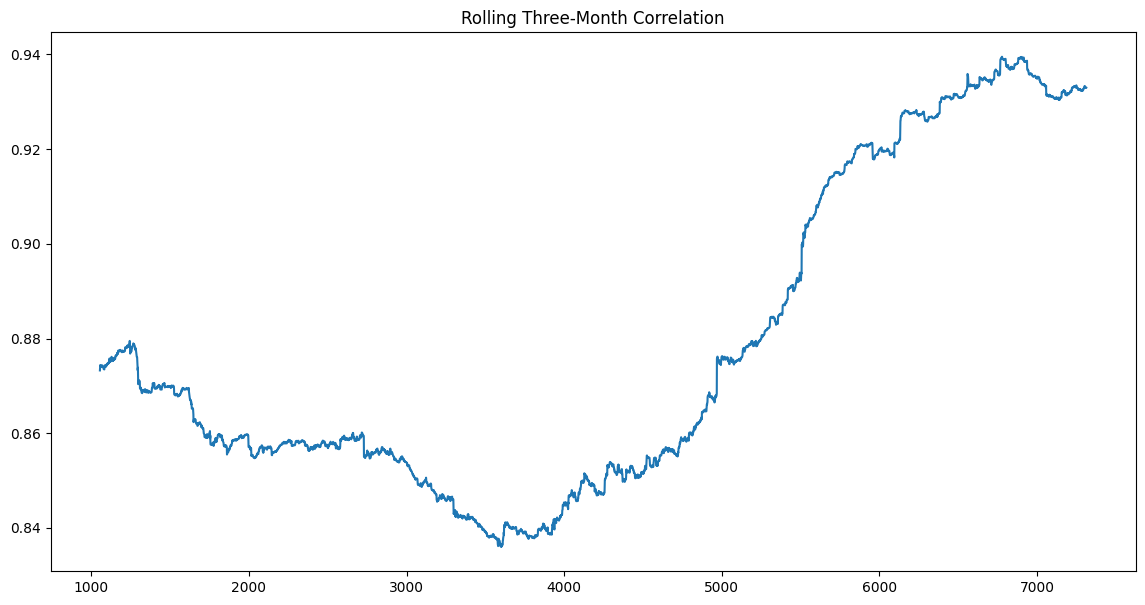

In [278]:
df = dataset_1h

df = remove_outliers_return(df)

# Drop any NaN values that occur from return calculation or missing intervals
df.dropna(subset=['Price_cme_return', 'Price_eth_return'], inplace=True)

# Calculate the overall correlation between returns
overall_correlation = df[['Price_cme_return', 'Price_eth_return']].corr().iloc[0, 1]
print(f"Overall Correlation: {overall_correlation * 100:.2f}%")

# Rolling correlation with a window of 3 months of data
# Assuming data is hourly and continuous, a 3-month window might contain approximately 24 * 90 = 2160 entries
# Adjust according to your actual data frequency and availability
rolling_window_size = 2160  # 1 h
# rolling_window_size = 25920 # 5 min
min_periods = 1000
rolling_correlation = df['Price_cme_return'].rolling(window=rolling_window_size, min_periods=min_periods).corr(df['Price_eth_return'])

# Get the minimum and maximum of the rolling correlation
min_rolling = rolling_correlation.min()
max_rolling = rolling_correlation.max()

print(f"Minimum Rolling Correlation (over 3 months): {min_rolling * 100:.2f}%")
print(f"Maximum Rolling Correlation (over 3 months): {max_rolling * 100:.2f}%")

# Optional: Plot the rolling correlation for visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
rolling_correlation.plot(title='Rolling Three-Month Correlation')
plt.show()


In [279]:
# Calculate correlation of deltas
correlation_matrix = dataset_1h[['Price_cme_delta', 'Price_eth_delta']].corr()

# Find the minimum and maximum correlation values
min_correlation = correlation_matrix.min().min()
max_correlation = correlation_matrix.max().max()

print("Correlation Matrix:\n", correlation_matrix)
print("Minimum Correlation:", min_correlation)
print("Maximum Correlation:", max_correlation)

Correlation Matrix:
                  Price_cme_delta  Price_eth_delta
Price_cme_delta         1.000000         0.923532
Price_eth_delta         0.923532         1.000000
Minimum Correlation: 0.9235324372253888
Maximum Correlation: 1.0


In [280]:
# Display correlations for deltas
show_correlation_delta(dataset_5m)


Kendall's Tau Correlation Coefficient:   19.7437
Spearman's Rank Correlation Coefficient: 26.9199
Pearson's Correlation Coefficient: 40.9097


In [281]:
# # Calculate rolling correlation with a dynamic window size
# def calculate_rolling_correlation(df, window_size):
#     return df['Price_cme'].rolling(window=window_size).corr(df['Price_eth'])

# # Assuming 'df_1m', 'df_5m', and 'df_1h' are your data frames for 1-minute, 5-minute, and 1-hour data
# # rolling_corr_1m = calculate_rolling_correlation(df_1m, 60*24*30*3)
# rolling_corr_5m = calculate_rolling_correlation(dataset_5m_deltas, 12*24*30*3)
# rolling_corr_1h = calculate_rolling_correlation(dataset_1h_deltas, 24*30*3)


# def print_correlation_stats(rolling_corr):
#     print(f"Maximum Correlation: {rolling_corr.max()*100:.2f}%")
#     print(f"Minimum Correlation: {rolling_corr.min()*100:.2f}%")


# print("\n5-minute Data Correlation Stats:")
# print_correlation_stats(rolling_corr_5m)

# print("\n1-hour Data Correlation Stats:")
# print_correlation_stats(rolling_corr_1h)

In [282]:
# # Calculating rolling standard deviation as a measure of volatility
# rolling_vol_5m_cme = dataset_5m['Price_cme'].rolling(window=12*24*30*3).std()
# rolling_vol_1h_cme = dataset_1h['Price_cme'].rolling(window=24*30*3).std()

# print("Volatility Analysis (CME Data):")
# print(f"5-minute data volatility range: {rolling_vol_5m_cme.min()} to {rolling_vol_5m_cme.max()}")
# print(f"1-hour data volatility range: {rolling_vol_1h_cme.min()} to {rolling_vol_1h_cme.max()}")

### Time Range

In [283]:
# def set_time_range(dataset):
#     return dataset[(dataset['Entry Date UTC'] >= '2022-01-03') & (dataset['Entry Date UTC'] <= '2024-03-31')]

# dataset_1h, dataset_5m= [set_time_range(df) for df in [dataset_1h, dataset_5m]]

# print(f'1h: \n{pd.concat([dataset_1h.head(1), dataset_1h.tail(1)])}\n')
# print(f'5m: \n{pd.concat([dataset_5m.head(1), dataset_5m.tail(1)])}\n')
# # print(f'1m: \n{pd.concat([dataset_1m.head(1), dataset_1m.tail(1)])}')


### Distributions

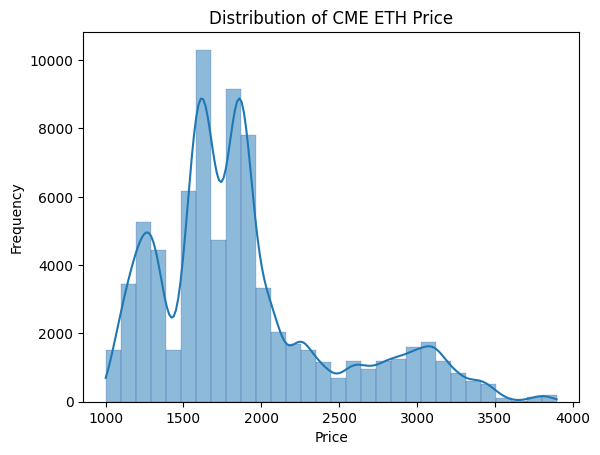

In [284]:
show_distribution(dataset_5m['Price_cme'], 'CME ETH')

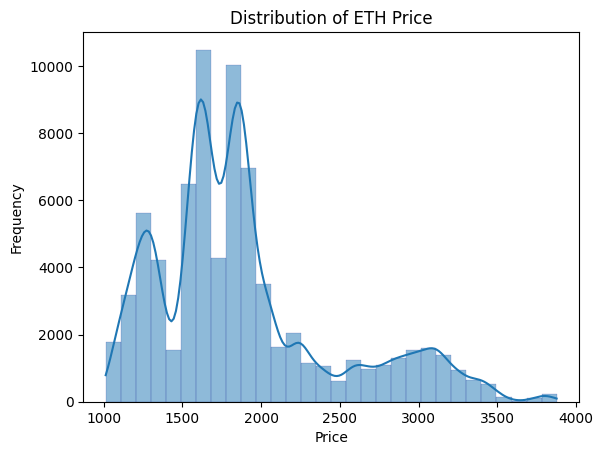

In [285]:
show_distribution(dataset_5m['Price_eth'], 'ETH')

The distribution of price is not normally distributed, showing a multimodal and possibly skewed pattern.

### Scatter Plots

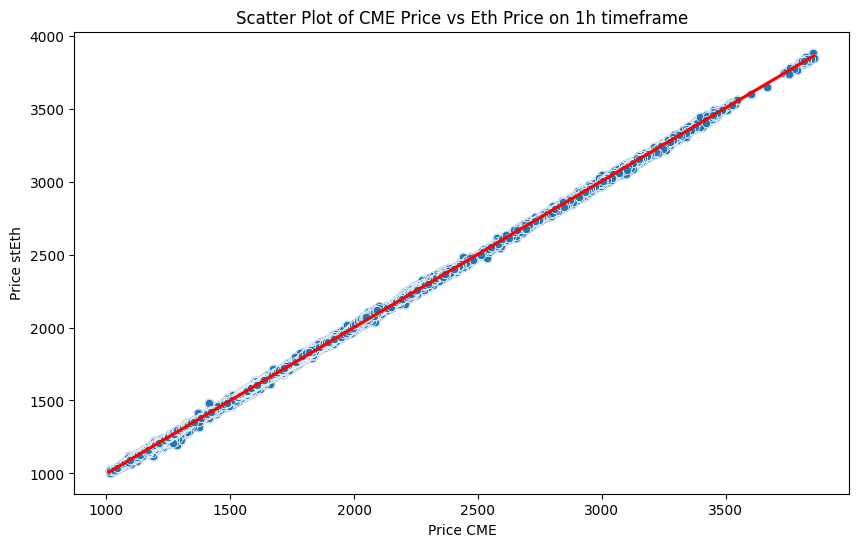

In [286]:
show_scatter(dataset_1h, '1h')

In [ ]:
show_correlation(dataset_1h)

Kendall's Tau Correlation Coefficient:   98.5841
Spearman's Rank Correlation Coefficient: 99.9645
Pearson Correlation Coefficient: 99.9758


In [ ]:
show_correlation_delta(dataset_1h)

Kendall's Tau Correlation Coefficient:   65.5895
Spearman's Rank Correlation Coefficient: 80.7989
Pearson's Correlation Coefficient: 86.7649


In [ ]:
dataset_1h.describe()

,Price_cme,Price_eth,Price_cme_delta,Price_eth_delta
count,18816.000000,18816.000000,18816.000000,18816.000000
mean,2003.263127,2000.293142,-0.011931,-0.016624
std,661.148372,656.594765,15.778081,14.328096
min,1003.000000,918.680000,-262.000000,-249.100000
25%,1579.000000,1581.057500,-3.000000,-4.260000
50%,1835.500000,1831.070000,0.000000,0.110000
75%,2327.125000,2319.110000,3.500000,4.600000
max,4115.000000,4071.120000,171.000000,129.250000


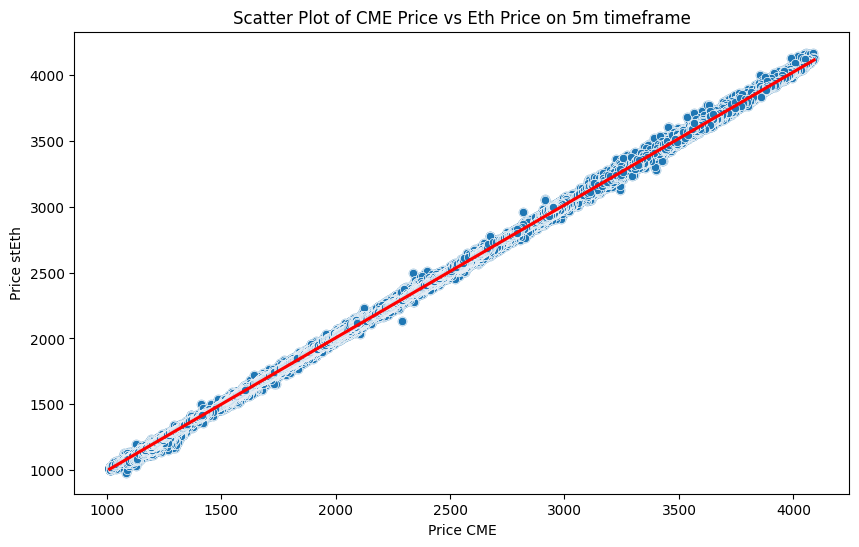

In [ ]:
show_scatter(dataset_5m, '5m')

In [ ]:
show_correlation(dataset_5m)

Kendall's Tau Correlation Coefficient:   98.5762
Spearman's Rank Correlation Coefficient: 99.9645
Pearson Correlation Coefficient: 99.9752


In [ ]:
show_correlation_delta(dataset_5m)

Kendall's Tau Correlation Coefficient:   16.2022
Spearman's Rank Correlation Coefficient: 22.3527
Pearson's Correlation Coefficient: 26.1647


In [ ]:
dataset_5m.describe()

,Price_cme,Price_eth,Price_cme_delta,Price_eth_delta
count,225781.000000,225781.000000,225781.000000,225781.000000
mean,2003.172902,2000.234991,-0.001076,-0.001407
std,661.034047,656.528305,5.652588,3.434002
min,996.000000,896.750000,-213.000000,-112.800000
25%,1579.000000,1581.290000,-0.500000,-0.970000
50%,1836.000000,1830.900000,0.000000,0.010000
75%,2326.500000,2319.030000,0.500000,1.010000
max,4165.500000,4091.200000,171.000000,75.750000


### Outliers hunting

In [ ]:
def show_outliers(df, n_times_sd):
    '''
    This function fits a linear regression model, calculates residuals, and prints rows where
    the absolute residuals exceed a specified number of standard deviations from the mean residual, 
    identifying these as outliers.
    '''
    # Fit the regression model
    model = LinearRegression()
    model.fit(df[['Price_cme']], df['Price_eth'])

    # Calculate predicted values
    df['predicted'] = model.predict(df[['Price_cme']])

    # Calculate residuals
    df['residuals'] = df['Price_eth'] - df['predicted']

    # Calculate the absolute residuals to determine the distance from the line
    df['abs_residuals'] = df['residuals'].abs()

    # Define a threshold
    std_dev = df['abs_residuals'].std()
    threshold = n_times_sd * std_dev

    # Filter rows where the absolute residuals are greater than the threshold
    outliers = df[df['abs_residuals'] > threshold]

    print(outliers[['Entry Date UTC', 'Price_cme', 'Price_eth', 'predicted', 'residuals']])


In [ ]:
show_outliers(dataset_5m, 12)

                Entry Date UTC  Price_cme  Price_eth    predicted   residuals
5379 2022-01-22 10:15:00+00:00     2612.0    2337.98  2604.485881 -266.505881
5380 2022-01-22 10:20:00+00:00     2612.0    2332.54  2604.485881 -271.945881
5381 2022-01-22 10:25:00+00:00     2612.0    2358.55  2604.485881 -245.935881
5479 2022-01-22 18:35:00+00:00     2612.0    2348.66  2604.485881 -255.825881
5480 2022-01-22 18:40:00+00:00     2612.0    2347.80  2604.485881 -256.685881
5481 2022-01-22 18:45:00+00:00     2612.0    2340.32  2604.485881 -264.165881
5482 2022-01-22 18:50:00+00:00     2612.0    2348.86  2604.485881 -255.625881
5483 2022-01-22 18:55:00+00:00     2612.0    2355.32  2604.485881 -249.165881
5484 2022-01-22 19:00:00+00:00     2612.0    2344.67  2604.485881 -259.815881
5485 2022-01-22 19:05:00+00:00     2612.0    2343.41  2604.485881 -261.075881
5486 2022-01-22 19:10:00+00:00     2612.0    2353.68  2604.485881 -250.805881
5487 2022-01-22 19:15:00+00:00     2612.0    2353.63  2604.48588